<a href="https://colab.research.google.com/github/haider-sattar/Housing-price-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization, Dropout

Load dataset

In [12]:
housing_data=fetch_california_housing()


In [22]:
print(type(housing_data))
features=housing_data.data
target=housing_data.target
df=pd.DataFrame(features,columns=housing_data.feature_names)
df['target']=pd.Series(target)
# df.head()
df.info()


<class 'sklearn.utils._bunch.Bunch'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
X=df.drop('target', axis=1).values
y=df['target'].values
scalar_x=StandardScaler()
X_scaled=scalar_x.fit_transform(X)
X_train_full,X_test_full, y_train_full,y_test_full=train_test_split(X_scaled,y,test_size=0.2, random_state=42)
X_train,X_valid, y_train,y_valid=train_test_split(X_train_full,y_train_full, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(13209, 8) (13209,)
(3303, 8) (3303,)


In [75]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),
    Dropout(0.2),
    tf.keras.layers.Dense(250, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    tf.keras.layers.Dense(150, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    tf.keras.layers.Dense(1)

])

In [86]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
history=model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2690 - mae: 0.3649 - val_loss: 0.2865 - val_mae: 0.3634
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2604 - mae: 0.3585 - val_loss: 0.2886 - val_mae: 0.3719
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2549 - mae: 0.3578 - val_loss: 0.2877 - val_mae: 0.3635
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2543 - mae: 0.3556 - val_loss: 0.2923 - val_mae: 0.3664
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2478 - mae: 0.3470 - val_loss: 0.3012 - val_mae: 0.3713
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2558 - mae: 0.3554 - val_loss: 0.2937 - val_mae: 0.3696
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2641 - mae: 0.3606 - val_loss: 0.2999 - val_mae: 0.3704
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2575 - mae: 0.3557 - val_loss: 0.2984 - val_mae: 0.3684
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - l

In [87]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "Assignment-01" / "seventh"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

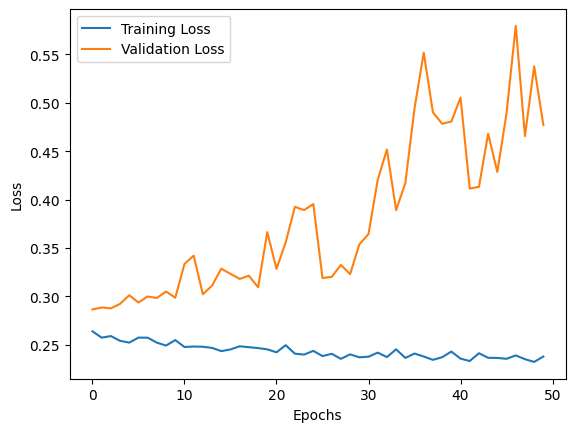

<Figure size 640x480 with 0 Axes>

In [88]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
save_fig('loss')

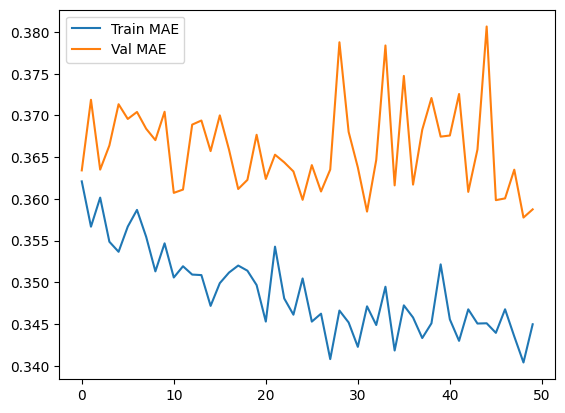

<Figure size 640x480 with 0 Axes>

In [89]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.show()
save_fig('mae')

In [90]:
test_loss, test_mae = model.evaluate(X_test_full, y_test_full, verbose=1)

print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2586 - mae: 0.3463
Test Loss (MSE): 0.26447218656539917
Test MAE: 0.3459230959415436
